# RFM Customer Segmentation & Cohort Analysis Project

This is a RFM project which we will apply RFM Analysis and Customer Segmentation using K-Means Clustering. Naturally we will conduct Data Cleaning, Data Visualization and Exploratory Data Analysis as well as Cohort and Conduct Cohort Analysis. 

# #Determines

We are going to use the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


---


First of all, to observe the structure of the data and missing values, we will use exploratory data analysis and data visualization techniques.

We are going to do descriptive analysis. Because we must understand the relationship of the features to each other and clear the noise and missing values in the data. After that, the data set will be ready for RFM analysis.

Before starting the RFM Analysis, we will do some analysis regarding the distribution of *Orders*, *Customers* and *Countries*. These analyzes will help the company develop its sales policies and contribute to the correct use of resources.

First eyecatching feature to notice is that the UK not only has the most sales revenue, but also the most customers. So we will decide whether we will continue to analyze only UK transactions or categorize countries as UK and Non-UK before we apply RFM Analysis, Customer Segmentation and K-Means Clustering.

Next, we will begin RFM Analysis, a customer segmentation technique based on customers' past purchasing behavior. 

By using RFM Analysis, one can enable companies to develop different approaches to different customer segments so that they can get to know their customers better, observe trends better, and increase customer retention and sales revenues.

We will calculate the Recency, Frequency and Monetary values of the customers in the RFM Analysis. Ultimately, we are going to create an RFM table containing these values.

In the Customer Segmentation section, we will create an RFM Segmentation Table where we segment our customers by using the RFM table. For example, we can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

We will segment the customers ourselves based on their recency, frequency, and monetary values. But can an **unsupervised learning** model do this better for us? We will use the K-Means algorithm to find the answer to this question. Then we will compare the classification made by the algorithm with the classification we have made ourselves.

Before applying K-Means Clustering, we should do data pre-processing. In this context, it will be useful to examine feature correlations and distributions. In addition, the data we apply for K-Means should be normalized.

After the above operations, we will have made cluster estimation with K-Means. We should visualize the cluster distribution by using a scatter plot. You can observe the properties of the resulting clusters with the help of the boxplot. Thus we will be able to tag clusters and interpret results.

Finally, we will do Cohort Analysis with the data you used at the beginning, regardless of the analysis we have done before. Cohort analysis is a subset of behavioral analytics that takes the user data and breaks them into related groups for analysis. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.


# #Project Structures

- Data Cleaning & Exploratory Data Analysis
- RFM Analysis
- Customer Segmentation
- Applying K-Means Clustering
- Create Cohort and Conduct Cohort Analysis

# 1. Data Cleaning & Exploratory Data Analysis

## Importing Modules for Data Cleaning and EDA

In [1]:
# Data and Stats packages
import pandas as pd
import numpy as np

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["axes.grid"] = False

import warnings
warnings.filterwarnings("ignore")

### i. Taking a look at the data we have

In [2]:
df_raw = pd.read_excel('Online Retail.xlsx')
df = df_raw

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Let's check the unique values including Nan's 

In [7]:
def first_look(i):
    val_count = df[i].value_counts(dropna=False)
    nan_i = df[i].isna().sum()
    val_count_df = pd.DataFrame(val_count)
    return print(f'FEATURE: {i}\n-------\nUNIQUE VALUES: {len(val_count)} \n\n\
    NULL VALUES: {nan_i} \n\n HEAD:\n\n{val_count_df.head(10)}\n\nTAIL:\n\n{val_count_df.tail(5)}\n')
    

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### ii. InvoiceNo

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

In [9]:
first_look(df.columns[0])

FEATURE: InvoiceNo
-------
UNIQUE VALUES: 25900 

    NULL VALUES: 0 

 HEAD:

        InvoiceNo
573585       1114
581219        749
581492        731
580729        721
558475        705
579777        687
581217        676
537434        675
580730        662
538071        652

TAIL:

         InvoiceNo
556308           1
556309           1
556310           1
556311           1
C567715          1



Now we check if we have a cancelled or somehow marked invoice number.

In [10]:
marked_invoice = df.InvoiceNo.str.extract(r'(.*\D.*)')[0].value_counts()
marked_invoice

C570867    101
C560540     57
C548460     45
C560855     41
C538341     39
          ... 
C543992      1
C568096      1
C548609      1
C578269      1
C567715      1
Name: 0, Length: 3839, dtype: int64

In [11]:
marked_invoice_df = df[df.InvoiceNo.str.extract(r'(.*\D.*)')[0].notnull()]
marked_invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Since C is a marker for cancelled orders with negative values in Quentity, this sounds logical. Are there other flags than C?

In [12]:
df[df.InvoiceNo.str.extract(r'([^C^c^\d].*)')[0].notnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


This appears to be a data entry error correction, as the unit price is assigned positive once and negative twice immediately after this entry.

We will drop all cancelled orders.

In [13]:
df[df.InvoiceNo.str.extract(r'(^\d{6}$)')[0].notnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


This is unexpected. One possible reason is the data type that InvoiceNo contains. Let's check if it contains integers.

In [14]:
df[df.InvoiceNo.apply(isinstance, args = [int])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


As we suspected, completed orders are stored as ordinal integer values. We will use the masking above to get completed orders and assign them to df itself.

In [15]:
df = df[df.InvoiceNo.apply(isinstance, args = [int])]

Before we proceed to the next column, let's check how many unique invoices do we have.

In [16]:
len(df.InvoiceNo.unique())

22061

### iii. StockCode

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

In [17]:
first_look(df.columns[1])

FEATURE: StockCode
-------
UNIQUE VALUES: 4058 

    NULL VALUES: 0 

 HEAD:

        StockCode
85123A       2271
85099B       2115
22423        2022
47566        1707
20725        1595
84879        1490
22197        1426
22720        1403
21212        1370
20727        1328

TAIL:

          StockCode
90127A            1
20871             1
47591b            1
DCGS0057          1
85034b            1



In [18]:
marked_stock_df = df[df.StockCode.str.extract(r'(.*\D.*)')[0].notnull()]
marked_stock_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [19]:
marked_stock_df.StockCode.value_counts(dropna=False)

85123A    2271
85099B    2115
POST      1130
85099C     946
82494L     926
          ... 
85018B       1
84596l       1
90135A       1
37477D       1
47591A       1
Name: StockCode, Length: 1120, dtype: int64

For now we leave this marks behind and proceed to the next column.

### iv. Description

Description: Product (item) name. Nominal.

In [20]:
first_look(df.columns[2])

FEATURE: Description
-------
UNIQUE VALUES: 4207 

    NULL VALUES: 1454 

 HEAD:

                                    Description
WHITE HANGING HEART T-LIGHT HOLDER         2327
JUMBO BAG RED RETROSPOT                    2115
REGENCY CAKESTAND 3 TIER                   2019
PARTY BUNTING                              1707
LUNCH BAG RED RETROSPOT                    1594
ASSORTED COLOUR BIRD ORNAMENT              1489
NaN                                        1454
SET OF 3 CAKE TINS PANTRY DESIGN           1399
PACK OF 72 RETROSPOT CAKE CASES            1370
LUNCH BAG  BLACK SKULL.                    1328

TAIL:

                                    Description
WHITE DOVE HONEYCOMB PAPER GARLAND            1
PINK BERTIE MOBILE PHONE CHARM                1
GLASS BELL JAR LARGE                          1
*Boombox Ipod Classic                         1
SET/5 RED SPOTTY LID GLASS BOWLS              1



In [21]:
description_null_df=df[df.Description.isna()]
description_null_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


UnitPrices seem to be 0.0 when Description is Null. Let's check if it is the case for all 1454 rows.

In [22]:
description_null_df[description_null_df.UnitPrice==0.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


This proves our assumption and we can discard orders with 0.0 UnitPrice and NaN as Description since they are not actual orders. 

In [23]:
df = df[df.Description.notna()]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### v. Quantity

Quantity: The quantities of each product (item) per transaction. Numeric. 

In [24]:
first_look(df.columns[3])

FEATURE: Quantity
-------
UNIQUE VALUES: 629 

    NULL VALUES: 0 

 HEAD:

    Quantity
1     148098
2      81763
12     61049
6      40846
4      38461
3      37088
24     24012
10     22273
8      13111
5      11730

TAIL:

       Quantity
 1820         1
-227          1
-224          1
-4830         1
 512          1



Negative quantities are interesting, this could be an inventory correction or an order cancellation. Let's take a closer look.

In [25]:
negative_quantity_df = df[df.Quantity<=.0]
negative_quantity_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


Not to our surprise, the unit prices are 0.0 for the orders with negative quantity. Let's check if this is the case for all 474 lines. 

In [26]:
negative_quantity_df[negative_quantity_df.UnitPrice==.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


We can discard these 474 rows from our dataset.

In [27]:
df = df[df.Quantity>.0]

### vi. InvoiceDate

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 

In [28]:
first_look(df.columns[4])

FEATURE: InvoiceDate
-------
UNIQUE VALUES: 18639 

    NULL VALUES: 0 

 HEAD:

                     InvoiceDate
2011-10-31 14:41:00         1114
2011-12-08 09:28:00          749
2011-12-09 10:03:00          731
2011-12-05 17:24:00          721
2011-06-29 15:58:00          705
2011-11-30 15:13:00          687
2011-12-08 09:20:00          676
2010-12-06 16:57:00          675
2011-12-05 17:28:00          662
2010-12-09 14:09:00          652

TAIL:

                     InvoiceDate
2011-06-28 17:01:00            1
2010-12-10 15:49:00            1
2011-02-04 09:10:00            1
2011-01-05 11:04:00            1
2011-06-16 12:36:00            1



In [29]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [30]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [31]:
order_by_year = pd.DatetimeIndex(df['InvoiceDate']).year.value_counts()
order_by_year

2011    489070
2010     41620
Name: InvoiceDate, dtype: int64

In [32]:
order_by_month = pd.DatetimeIndex(df['InvoiceDate']).month.value_counts()
order_by_month

11    83444
12    66745
10    59337
9     49285
7     38661
5     36250
6     36018
3     35843
8     34521
1     34319
4     29108
2     27159
Name: InvoiceDate, dtype: int64

In [33]:
order_by_hour = pd.DatetimeIndex(df['InvoiceDate']).hour.value_counts()
order_by_hour

12    77149
15    76320
13    71031
14    66181
11    56264
16    53394
10    47841
9     33718
17    27572
8      8804
18     7718
19     3516
20      802
7       379
6         1
Name: InvoiceDate, dtype: int64

These temporal trends can have a significant impact on customer behavior. For now, we will not add new features such as month and hour of purchase, but before we create clusters, we will look at this issue again.

### vii. UnitPrice

UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

In [34]:
first_look(df.columns[5])

FEATURE: UnitPrice
-------
UNIQUE VALUES: 1291 

    NULL VALUES: 0 

 HEAD:

      UnitPrice
1.25      49753
1.65      37498
0.85      28061
2.95      27106
0.42      24302
4.95      18502
3.75      18173
2.10      17407
2.46      17091
0.83      16886

TAIL:

         UnitPrice
283.00           1
836.14           1
208.34           1
2196.67          1
192.54           1



In [35]:
df.UnitPrice.max()

13541.33

In [36]:
df.UnitPrice.min()

0.0

In [37]:
df.UnitPrice.describe()

count    530690.000000
mean          3.882466
std          32.528533
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [38]:
df[df.UnitPrice==.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
14335,537534,85064,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
14336,537534,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524622,580609,22927,Amazon,1,2011-12-05 11:41:00,0.0,NaN,United Kingdom
535325,581202,23404,check,41,2011-12-07 18:30:00,0.0,NaN,United Kingdom
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom


We are going to drop rows that have 0.0 UnitPrice.

In [39]:
df = df[df.UnitPrice>0.0]

### viii. CustomerID

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

In [40]:
first_look(df.columns[6])

FEATURE: CustomerID
-------
UNIQUE VALUES: 4339 

    NULL VALUES: 132219 

 HEAD:

         CustomerID
NaN          132219
17841.0        7847
14911.0        5675
14096.0        5111
12748.0        4595
14606.0        2700
15311.0        2379
14646.0        2076
13089.0        1818
13263.0        1677

TAIL:

         CustomerID
17948.0           1
15753.0           1
17956.0           1
16881.0           1
12346.0           1



We have a large amount of null values in the "CustomerID" column. Since this is a unique number, we have limited options to populate these values and we will most likely discard them. 
Let's take a closer look.

In [41]:
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


All characteristics except the customer ID seem to be concrete. On the other hand, the customer ID is a key feature from the perspective of RMF analysis, and orders without it could lead to biases in the analysis. Hence we are going to discard these rows in our dataset. For future analyses, we will save a version of the dataset that also includes NaN customer ID values, but our main dataset will be cleaned of these NaN values.

In [42]:
df_with_na_customers = df
df = df[df.CustomerID.notna()]

### iX. Country

Country: Country name. Nominal, the name of the country where each customer resides.

In [43]:
first_look(df.columns[7])

FEATURE: Country
-------
UNIQUE VALUES: 37 

    NULL VALUES: 0 

 HEAD:

                Country
United Kingdom   354321
Germany            9040
France             8341
EIRE               7236
Spain              2484
Netherlands        2359
Belgium            2031
Switzerland        1841
Portugal           1462
Australia          1182

TAIL:

                Country
Lithuania            35
Brazil               32
Czech Republic       25
Bahrain              17
Saudi Arabia          9



In [44]:
country_dist = pd.DataFrame(df.Country.value_counts())
country_dist

,Country
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484
Netherlands,2359
Belgium,2031
Switzerland,1841
Portugal,1462
Australia,1182


In [45]:
df[df.Country=='Unspecified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,2011-08-22 13:32:00,16.95,14265.0,Unspecified
308811,564051,21833,CAMOUFLAGE LED TORCH,12,2011-08-22 13:32:00,1.69,14265.0,Unspecified
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,2011-08-22 13:32:00,8.25,14265.0,Unspecified
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,2011-08-22 13:32:00,6.65,14265.0,Unspecified


In 241 orders Countries is not specified. Yet, they seem valid and we will keep them.  

<AxesSubplot:xlabel='Country'>

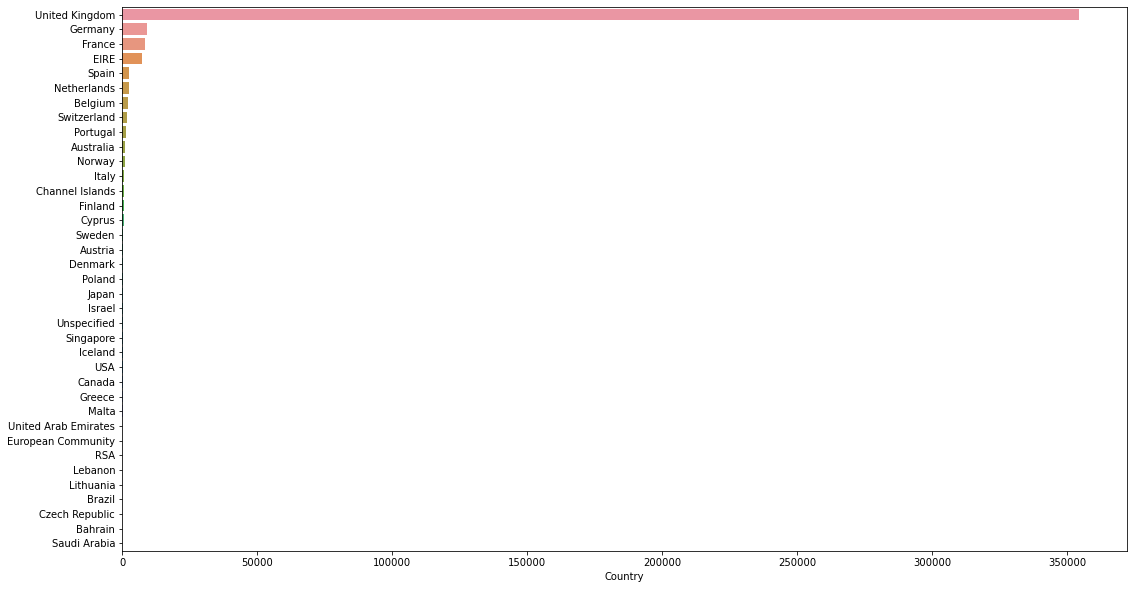

In [46]:
plt.figure(figsize=(18,10))
sns.barplot(y=country_dist.index,x='Country',data=country_dist)

As we can see, the UK has the largest share of our dataset. We have two options here: The first is to consider only orders from the UK, or we can consider two types of countries, domestic and international. We choose the second option in order not to lose valuable features of customer behavior. Yet, we leave this transformation to the next step.

### X. Handling Duplications

In [47]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


We have 5192 rows that are duplicated, and since our orders are unique, we should discard these duplicates.

In [48]:
df = df.drop_duplicates(keep='first')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### xi. Exploring the Orders


    (1) Unique number of InvoiceNo per customer

In [49]:
custmr_invoice_unique = pd.DataFrame(df.groupby('CustomerID').InvoiceNo.unique())
custmr_invoice_unique['Total_Invoices']=custmr_invoice_unique.InvoiceNo.apply(lambda x:len(x))

In [50]:
custmr_invoice_unique.sort_values(['Total_Invoices'], ascending=False, inplace=True )
custmr_invoice_unique

,InvoiceNo,Total_Invoices
CustomerID,,
12748.0,"[536521, 536641, 537136, 537140, 537142, 53715...",209
14911.0,"[536540, 536541, 536803, 536975, 537368, 53737...",201
17841.0,"[536557, 536984, 537405, 538163, 538866, 53946...",124
13089.0,"[537040, 537393, 537394, 538653, 538654, 53903...",97
14606.0,"[536591, 537209, 537765, 538839, 538846, 53924...",93
...,...,...
15314.0,[554498],1
15313.0,[563934],1
15308.0,[546243],1


In [51]:
avg_custmr_invoice = custmr_invoice_unique.Total_Invoices.sum()/custmr_invoice_unique.shape[0]
print(f'Our customers issued {avg_custmr_invoice:.2f} unique orders on an average.')

Our customers issued 4.27 unique orders on an average.


    (2) Average number of unqiue items per order

In [52]:
invoice_item_unique = pd.DataFrame(df.groupby('InvoiceNo').StockCode.unique())
invoice_item_unique['Total_Items'] = invoice_item_unique.StockCode.apply(lambda x:len(x))
invoice_item_unique.sort_values(['Total_Items'], ascending=False, inplace=True)
invoice_item_unique

,StockCode,Total_Items
InvoiceNo,,
576339,"[10135, 15044A, 16238, 16258A, 17003, 20617, 2...",541
579196,"[21793, 21809, 21810, 21846, 21867, 21868, 218...",529
580727,"[16225, 16238, 16258A, 17003, 20653, 20659, 20...",525
578270,"[21284, 21285, 21329, 21356, 21367, 21372, 214...",439
573576,"[85035C, 85039A, 85039B, 85049A, 85049E, 85049...",434
...,...,...
559677,[22726],1
545790,[22624],1
545822,[82486],1


In [53]:
avg_invoice_item = invoice_item_unique.Total_Items.sum()/invoice_item_unique.shape[0]
print(f'We\'ve had {avg_invoice_item:.1f} unique items of order on an average.')

We've had 20.9 unique items of order on an average.


    (3) Average number of unqiue items per customer

In [54]:
custmr_item_unique = pd.DataFrame(df.groupby('CustomerID').StockCode.unique())
custmr_item_unique['Total_Items'] = custmr_item_unique.StockCode.apply(lambda x:len(x))
custmr_item_unique.sort_values(['Total_Items'], ascending=False, inplace=True)
custmr_item_unique

,StockCode,Total_Items
CustomerID,,
14911.0,"[22968, 85071A, 85071C, 22355, 21579, 21576, 2...",1787
12748.0,"[22854, 22187, 20894, 85018D, 21413, 79149B, 2...",1768
17841.0,"[21495, 46000R, 46000S, 22731, 21258, 21041, 8...",1323
14096.0,"[16207B, 16225, 16254, 84249A, 84659A, DOT, 20...",1119
14298.0,"[84660A, 84509E, 84356, 82613C, 82613B, 75178,...",884
...,...,...
15389.0,[62018],1
18174.0,[85099B],1
12823.0,[48138],1


In [55]:
avg_custmr_item = custmr_item_unique.Total_Items.sum()/custmr_item_unique.shape[0]
print(f'Our customers ordered {avg_custmr_item:.1f} unique items on an average.')

Our customers ordered 61.5 unique items on an average.


### xii. Exploring Customers by Country

    (1) Total revenue per country

In [56]:
df['Revenue'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [57]:
country_revenue = pd.DataFrame(df.groupby('Country').Revenue.sum())
country_revenue.sort_values('Revenue', ascending=False, inplace=True)

<AxesSubplot:xlabel='Revenue', ylabel='Country'>

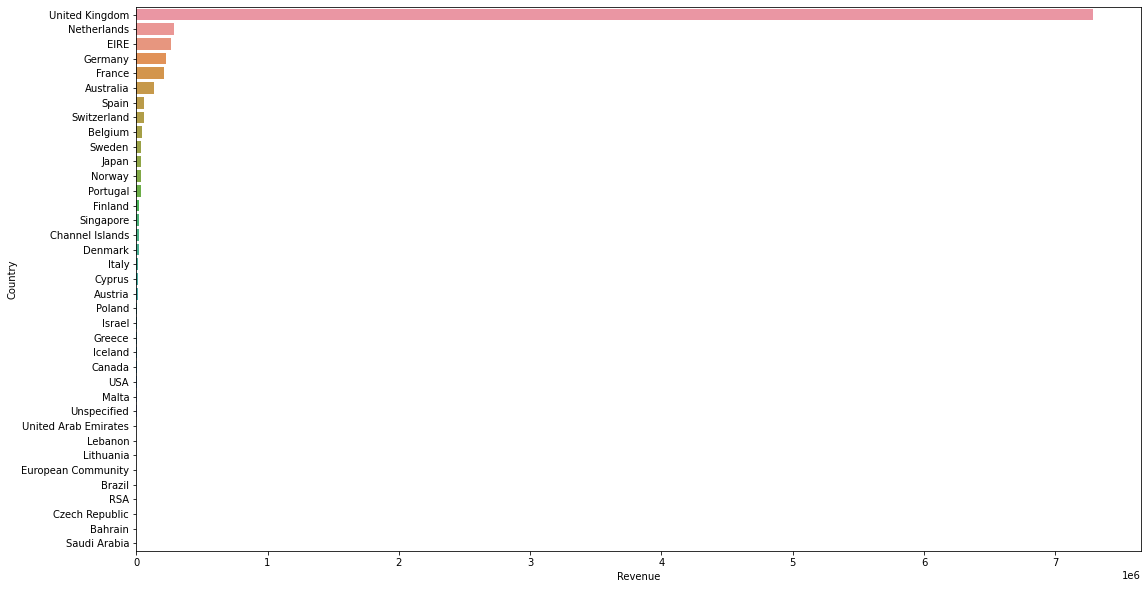

In [58]:
plt.figure(figsize=(18,10))
sns.barplot(x='Revenue', y=country_revenue.index, data=country_revenue)

In [59]:
print(f'United Kingdom posesses % {100*country_revenue.Revenue[0]/sum(country_revenue.Revenue[:]):.2f} of all revenues we have.')

United Kingdom posesses % 81.97 of all revenues we have.


    (2) Visualizing number of customer per country

In [60]:
country_customer = pd.DataFrame(df.groupby('Country').CustomerID.sum())
country_customer.sort_values('CustomerID', ascending=False, inplace=True)

Text(0.5, 0, 'Number of Customers')

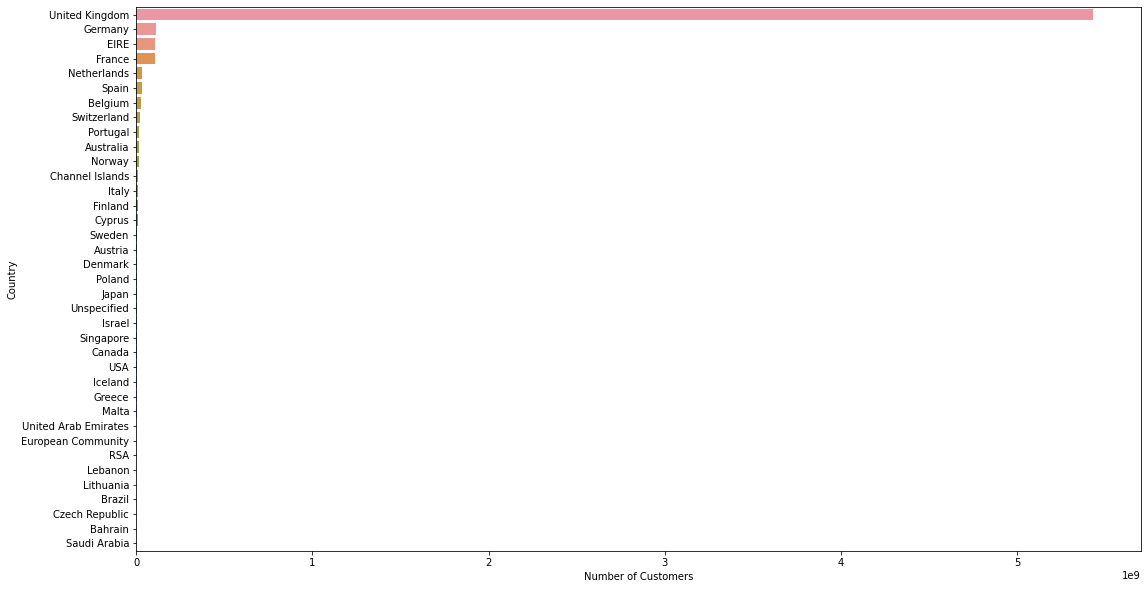

In [61]:
plt.figure(figsize=(18,10))
sns.barplot(x='CustomerID', y=country_customer.index, data=country_customer)
plt.xlabel('Number of Customers')

In [62]:
print(f'% {100*country_customer.CustomerID[0]/sum(country_customer.CustomerID[:]):.2f} of all our customers resides in United Kingdom.')

% 90.44 of all our customers resides in United Kingdom.


    (3) The most popular products by country

In [63]:
county_products_quantity = pd.DataFrame(df.groupby(['Country','StockCode']).Quantity.sum())
country_products_revenue = pd.DataFrame(df.groupby(['Country','StockCode']).Revenue.sum())
country_product = pd.merge(county_products_quantity, country_products_revenue, on=['Country','StockCode'])
country_product

Quantity  Revenue
Country     StockCode                   
Australia   15036           600   432.00
            20665             6    17.70
            20675           216   228.96
            20676           216   228.96
            20677           216   228.96
...                         ...      ...
Unspecified 85049A            1     1.25
            85179A            1     4.65
            85179C            1     4.65
            85180A            2     9.30
            85180B            1     4.65

[18934 rows x 2 columns]

In [64]:
country_product.groupby('Country').Revenue.sum().sort_values(ascending=False)

Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [65]:
def country_trend(country_x):
    country_df = country_product[country_product.index.isin([country_x], level=0)]
    country_df = country_df.sort_values('Quantity', ascending=False)
    return country_df

In [66]:
country_trend('United Kingdom').head(10)

Quantity    Revenue
Country        StockCode                     
United Kingdom 23843         80995  168469.60
               23166         76919   80291.44
               84077         49086   12109.96
               22197         45609   34409.53
               85099B        41878   77191.33
               85123A        34687   94960.85
               84879         32628   52228.68
               22616         24321    6928.65
               17003         22675    5891.49
               21212         22442   10989.60

In [67]:
country_trend('Netherlands').head(10)

Quantity  Revenue
Country     StockCode                   
Netherlands 23084          4801  9568.48
            22629          4528  7485.60
            22630          4132  6828.60
            21212          4128  1740.00
            22326          3132  7991.40
            21731          2388  3479.40
            20719          2310  1664.50
            20724          2100  1512.00
            22243          2016  2923.20
            85099B         2000  3468.00

    (4) Transforming Country as UK and Non-UK

In [68]:
df['Country'] = df.Country.apply(lambda x:1 if x=='United Kingdom' else 0)

In [69]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
334559,566258,23130,MISTLETOE HEART WREATH GREEN,6,2011-09-11 12:45:00,4.15,13124.0,1,24.90
531588,580956,85114B,IVORY ENCHANTED FOREST PLACEMAT,6,2011-12-06 14:23:00,1.65,17841.0,1,9.90
39746,539663,22937,BAKING MOULD CHOCOLATE CUPCAKES,1,2010-12-21 10:26:00,2.55,17961.0,1,2.55
228325,556926,23103,JINGLE BELL HEART DECORATION,1,2011-06-15 14:26:00,1.65,16324.0,1,1.65
284874,561891,72127,COLUMBIAN CANDLE ROUND,2,2011-07-31 14:19:00,1.25,15438.0,1,2.50
367276,568878,23355,HOT WATER BOTTLE KEEP CALM,2,2011-09-29 12:34:00,4.95,14524.0,1,9.90
236949,557793,21121,SET/10 RED POLKADOT PARTY CANDLES,5,2011-06-22 17:30:00,1.25,14998.0,1,6.25
310737,564199,23333,IVORY WICKER HEART MEDIUM,5,2011-08-23 17:31:00,1.25,13263.0,1,6.25
342985,566923,22624,IVORY KITCHEN SCALES,1,2011-09-15 15:05:00,8.50,15511.0,1,8.50
508598,579254,46000S,POLYESTER FILLER PAD 40x40cm,8,2011-11-28 17:05:00,1.45,14511.0,1,11.60


### We will continue analyzing transactions with customer segmentation.

# 2. RFM Analysis

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value


Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign? 

### i. Import Libraries

In [70]:
import datetime as dt
from datetime import timedelta

### ii. Review DataFrame

In [71]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,1,20.34


In [72]:
rfm_df = df

### iii. Recency: Days since last purchase

    (1) Choosing a date as a point of reference to evaluate how many days ago was the customer's last purchase.

In [73]:
rfm_df['Date']=rfm_df.InvoiceDate.dt.date

In [74]:
rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,1,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,1,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,1,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,1,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,1,20.34,2010-12-01


In [75]:
ref_date = rfm_df.Date.max() + timedelta(days=2)
ref_date

datetime.date(2011, 12, 11)

     (2) Grouping by CustomerID and checking the last date of purchase

In [76]:
customer_recency = pd.DataFrame(rfm_df.groupby('CustomerID', as_index=False).Date.max())
customer_recency.head()

,CustomerID,Date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


    (3) Calculating Recency

In [77]:
customer_recency['Recency'] = ref_date - customer_recency.Date
customer_recency

,CustomerID,Date,Recency
0,12346.0,2011-01-18,327 days
1,12347.0,2011-12-07,4 days
2,12348.0,2011-09-25,77 days
3,12349.0,2011-11-21,20 days
4,12350.0,2011-02-02,312 days
...,...,...,...
4333,18280.0,2011-03-07,279 days
4334,18281.0,2011-06-12,182 days
4335,18282.0,2011-12-02,9 days
4336,18283.0,2011-12-06,5 days


In [78]:
customer_recency['Recency'] = pd.to_numeric(customer_recency['Recency'].dt.days.astype('int64'))

In [79]:
customer_recency.drop(columns=['Date'], inplace=True, axis=1)

In [80]:
customer_recency

,CustomerID,Recency
0,12346.0,327
1,12347.0,4
2,12348.0,77
3,12349.0,20
4,12350.0,312
...,...,...
4333,18280.0,279
4334,18281.0,182
4335,18282.0,9
4336,18283.0,5


    (4) Plot RFM distributions

<AxesSubplot:ylabel='Recency'>

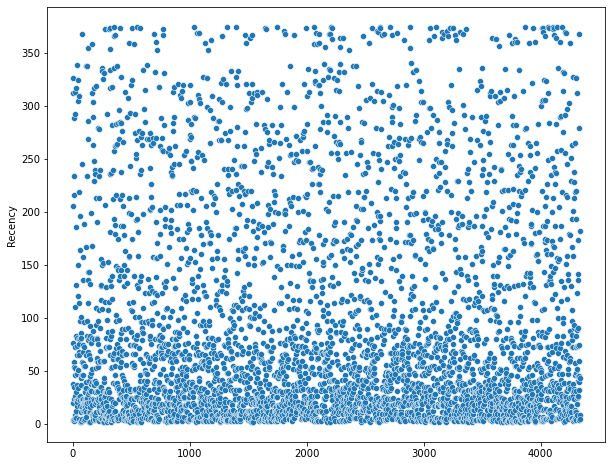

In [81]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=customer_recency.Recency)

<AxesSubplot:xlabel='Recency'>

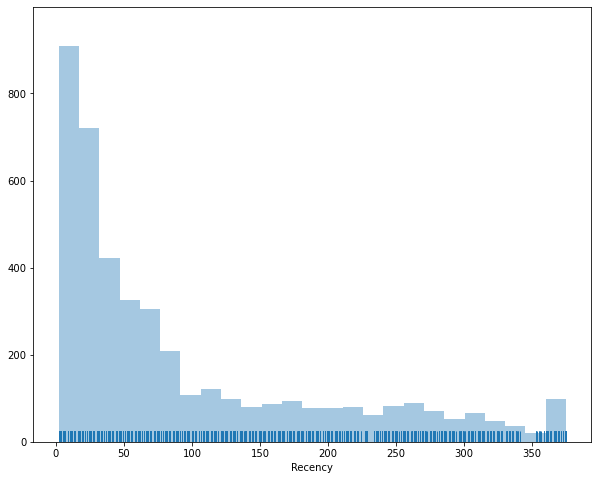

In [82]:
plt.figure(figsize=(10,8))
sns.distplot(customer_recency.Recency, kde=False, rug=True)

### iv. Frequency: Number of purchases

To calculate how many times a customer purchased something, we need to count how many invoices each customer has.

    (1) Calculating the frequency of purchases

In [83]:
customer_frequency = rfm_df.groupby('CustomerID',as_index=False)['InvoiceNo'].nunique()

In [84]:
customer_frequency.rename(columns={'InvoiceNo':'Frequency'}, inplace=True)
customer_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


    (2) Plot RFM distributions

<AxesSubplot:ylabel='Frequency'>

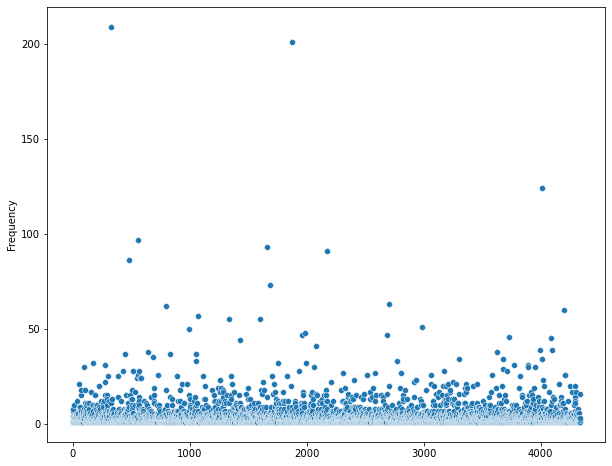

In [85]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=customer_frequency.Frequency)

<AxesSubplot:xlabel='Frequency'>

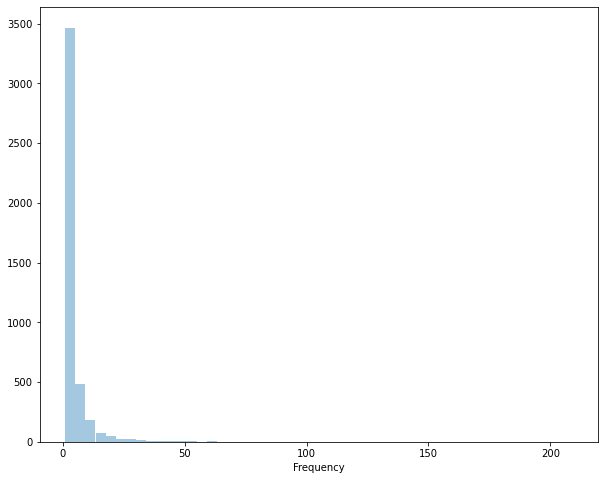

In [86]:
plt.figure(figsize=(10,8))
sns.distplot(customer_frequency.Frequency, kde=False)

### v. Monetary: Total amount of money spent

    (1) Calculating the "Monetary" by customers

In [87]:
customer_monetary = rfm_df.groupby('CustomerID',as_index=False)['Revenue'].sum()
customer_monetary.rename(columns={'Revenue':'Monetary'}, inplace=True)
customer_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


    (2) Plot Monetary distributions

<AxesSubplot:ylabel='Monetary'>

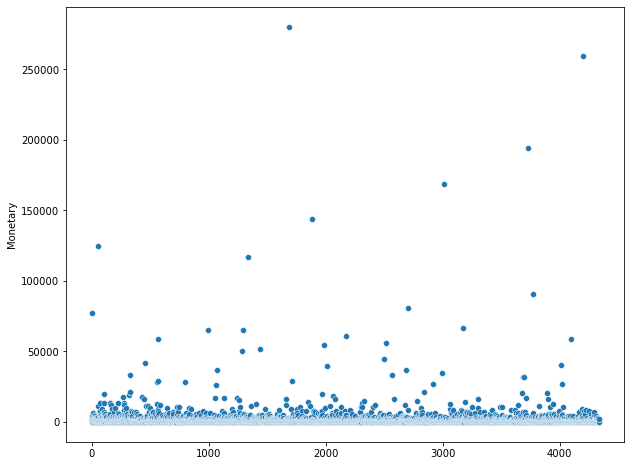

In [88]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=customer_monetary.Monetary)

<AxesSubplot:xlabel='Monetary'>

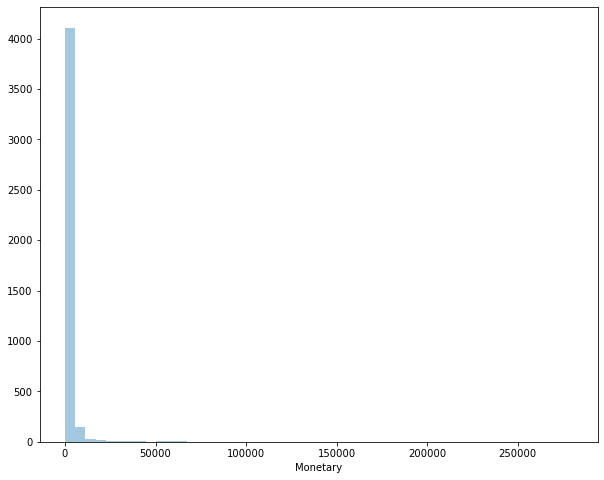

In [89]:
plt.figure(figsize=(10,8))
sns.distplot(customer_monetary.Monetary, kde=False)

### vi. Merging the recency, frequency and motetary dataframes

In [90]:
customer_rfm = pd.merge(pd.merge(customer_recency, customer_frequency, on='CustomerID'), customer_monetary, on='CustomerID')
customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,327,1,77183.60
1,12347.0,4,7,4310.00
2,12348.0,77,4,1797.24
3,12349.0,20,1,1757.55
4,12350.0,312,1,334.40


# 3. Customer Segmentation with RFM Scores

## Calculating RFM Scoring

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, we will use the customer_rfm data set resulting from the RFM analysis.


### i. Creating the RFM Segmentation Table


    (1) Dividing the customer_rfm into quarters

In [91]:
customer_rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,94.059474,4.272015,2048.688081
std,1721.808492,100.012264,7.697998,8985.230220
min,12346.000000,2.000000,1.000000,3.750000
25%,13813.250000,19.000000,1.000000,306.482500
50%,15299.500000,52.000000,2.000000,668.570000
75%,16778.750000,143.750000,5.000000,1660.597500
max,18287.000000,375.000000,209.000000,280206.020000


    (2) RFM scoring

In [92]:
def recency_scoring(rfm):
    if rfm.Recency <= 19.0:
        recency_score = 4
    elif rfm.Recency <= 52.0:
        recency_score = 3
    elif rfm.Recency <= 143.0:
        recency_score = 2
    else:
        recency_score = 1
    return recency_score
customer_rfm['R'] = customer_rfm.apply(recency_scoring, axis=1)
customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R
0,12346.0,327,1,77183.60,1
1,12347.0,4,7,4310.00,4
2,12348.0,77,4,1797.24,2
3,12349.0,20,1,1757.55,3
4,12350.0,312,1,334.40,1


In [93]:
def frequency_scoring(rfm):
    if rfm.Frequency >= 10.0:
        frequency_score = 4
    elif rfm.Frequency >= 6.0:
        frequency_score = 3
    elif rfm.Frequency <= 3.0:
        frequency_score = 2
    else:
        frequency_score = 1
    return frequency_score
customer_rfm['F'] = customer_rfm.apply(frequency_scoring, axis=1)
customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F
0,12346.0,327,1,77183.60,1,2
1,12347.0,4,7,4310.00,4,3
2,12348.0,77,4,1797.24,2,1
3,12349.0,20,1,1757.55,3,2
4,12350.0,312,1,334.40,1,2


In [94]:
def monetary_scoring(rfm):
    if rfm.Monetary >= 1660.0:
        monetary_score = 4
    elif rfm.Monetary >= 668.0:
        monetary_score = 3
    elif rfm.Monetary <= 306.0:
        monetary_score = 2
    else:
        monetary_score = 1
    return monetary_score
customer_rfm['M'] = customer_rfm.apply(monetary_scoring, axis=1)
customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,327,1,77183.60,1,2,4
1,12347.0,4,7,4310.00,4,3,4
2,12348.0,77,4,1797.24,2,1,4
3,12349.0,20,1,1757.55,3,2,4
4,12350.0,312,1,334.40,1,2,1


In [95]:
def rfm_scoring(customer):
    return str(int(customer['R'])) + str(int(customer['F'])) + str(int(customer['M']))


customer_rfm['RFM_score'] = customer_rfm.apply(rfm_scoring, axis=1)
customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score
0,12346.0,327,1,77183.60,1,2,4,124
1,12347.0,4,7,4310.00,4,3,4,434
2,12348.0,77,4,1797.24,2,1,4,214
3,12349.0,20,1,1757.55,3,2,4,324
4,12350.0,312,1,334.40,1,2,1,121


In [96]:
segments = {'Customer Segment':['Champions','Loyal Customers','Potential Loyalist', 'Recent Customers', 'Customers Needing Attention', 'Still Got Hope', 'Need to Get Them Back','Lost', 'Give it a Try'],\
            'RFM':['(3|4)-(3|4)-(3|4)', '(2|3|4)-(3|4)-(1|2|3|4)', '(3|4)-(2|3)-(1|2|3|4)', '(4)-(1)-(1|2|3|4)', '(2|3)-(2|3)-(2|3)', '(2|3)-(1|2)-(1|2|3|4)', '(1|2)-(3|4)-(3|4)', '(1|2)-(1|2)-(1|2)','(1|2)-(1|2|3)-(1|2|3|4)']}
pd.DataFrame(segments)

,Customer Segment,RFM
0,Champions,(3|4)-(3|4)-(3|4)
1,Loyal Customers,(2|3|4)-(3|4)-(1|2|3|4)
2,Potential Loyalist,(3|4)-(2|3)-(1|2|3|4)
3,Recent Customers,(4)-(1)-(1|2|3|4)
4,Customers Needing Attention,(2|3)-(2|3)-(2|3)
5,Still Got Hope,(2|3)-(1|2)-(1|2|3|4)
6,Need to Get Them Back,(1|2)-(3|4)-(3|4)
7,Lost,(1|2)-(1|2)-(1|2)
8,Give it a Try,(1|2)-(1|2|3)-(1|2|3|4)


In [97]:
def cathegorizer(rfm):
    if (rfm[0] in ['3', '4']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Champions'
        
    elif (rfm[0] in ['2', '3', '4']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Loyal Customers'
        
    elif (rfm[0] in ['3', '4']) & (rfm[1] in ['2', '3']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Potential Loyalist'
    
    elif (rfm[0] in ['4']) & (rfm[1] in ['1']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Recent Customers'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['2', '3']) & (rfm[2] in ['2', '3']):
        rfm = 'Customers Needing Attention'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Still Got Hope'
    
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Need to Get Them Back'
                
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['1', '2']) & (rfm[2] in ['1', '2']):
        rfm = 'Lost'
    
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['1', '2', '3']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Give it a Try'
    
    return rfm 

In [98]:
customer_rfm['Cathegory'] = customer_rfm.RFM_score.apply(cathegorizer)

In [99]:
customer_rfm.Cathegory.value_counts(dropna=False, normalize=True)

Potential Loyalist             0.230982
Lost                           0.202628
Champions                      0.173582
Still Got Hope                 0.159521
Customers Needing Attention    0.111572
Recent Customers               0.051406
Give it a Try                  0.043568
Loyal Customers                0.022822
Need to Get Them Back          0.003919
Name: Cathegory, dtype: float64

In [100]:
customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score,Cathegory
0,12346.0,327,1,77183.60,1,2,4,124,Give it a Try
1,12347.0,4,7,4310.00,4,3,4,434,Champions
2,12348.0,77,4,1797.24,2,1,4,214,Still Got Hope
3,12349.0,20,1,1757.55,3,2,4,324,Potential Loyalist
4,12350.0,312,1,334.40,1,2,1,121,Lost


## Plot RFM Segments

1. Create your plot and resize it.

In [101]:
segmented = pd.DataFrame(customer_rfm.Cathegory.value_counts(dropna=False).sort_values(ascending=False))
segmented.reset_index(inplace=True)
segmented.rename(columns={'index':'Segments', 'Cathegory':'Customers'}, inplace=True)

In [102]:
segmented

,Segments,Customers
0,Potential Loyalist,1002
1,Lost,879
2,Champions,753
3,Still Got Hope,692
4,Customers Needing Attention,484
5,Recent Customers,223
6,Give it a Try,189
7,Loyal Customers,99
8,Need to Get Them Back,17


<AxesSubplot:xlabel='Segments', ylabel='Customers'>

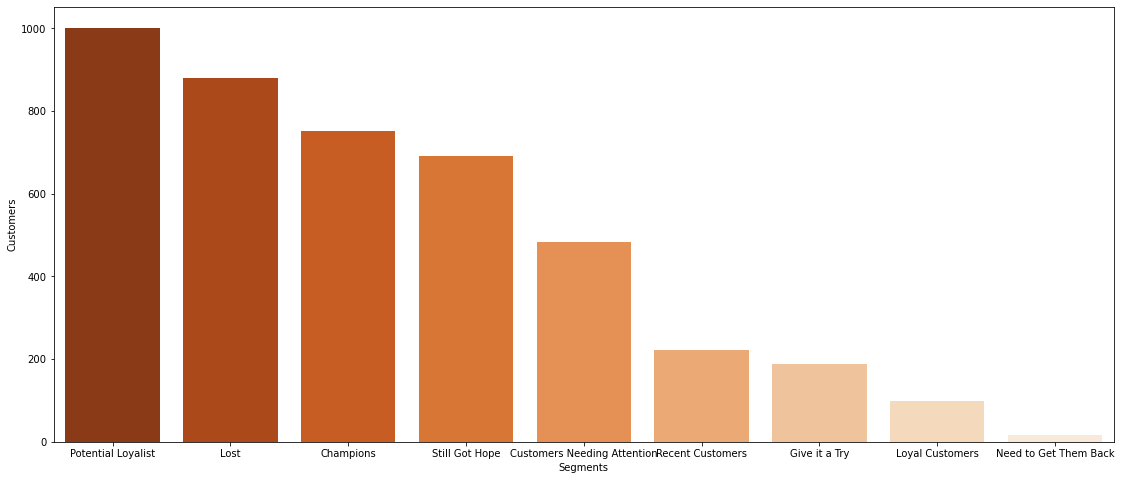

In [103]:
plt.figure(figsize=(19, 8))
sns.barplot(data=segmented, x='Segments', y='Customers', palette='Oranges_r')

An example for using customer segmentation categories found [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales). Since we applied cathegorisation that suits our needs we can formulate different marketing strategies and approaches for customer engagement for each type of customer.

# 3. Applying K-Means Clustering

Now that we have our customers segmented into 9 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

## Data Pre-Processing and Exploring

In [104]:
country_df = pd.DataFrame(rfm_df.groupby('CustomerID').Country.unique())
country_df['Country'] = country_df.Country.apply(lambda x:x[0])

In [105]:
kmeans_df = customer_rfm.set_index('CustomerID')[['Recency','Frequency','Monetary']]
kmeans_df = kmeans_df.merge(country_df, on='CustomerID')
kmeans_df

,Recency,Frequency,Monetary,Country
CustomerID,,,,
12346.0,327,1,77183.60,1
12347.0,4,7,4310.00,0
12348.0,77,4,1797.24,0
12349.0,20,1,1757.55,0
12350.0,312,1,334.40,0
...,...,...,...,...
18280.0,279,1,180.60,1
18281.0,182,1,80.82,1
18282.0,9,2,178.05,1


### i. Defining and Plotting Feature Correlations

Creating Heatmap and evaluating the the correlation between the features

In [106]:
kmeans_df.corr()

,Recency,Frequency,Monetary,Country
Recency,1.000000,-0.260783,-0.121975,-0.009719
Frequency,-0.260783,1.000000,0.552780,-0.010180
Monetary,-0.121975,0.552780,1.000000,-0.064853
Country,-0.009719,-0.010180,-0.064853,1.000000


<AxesSubplot:>

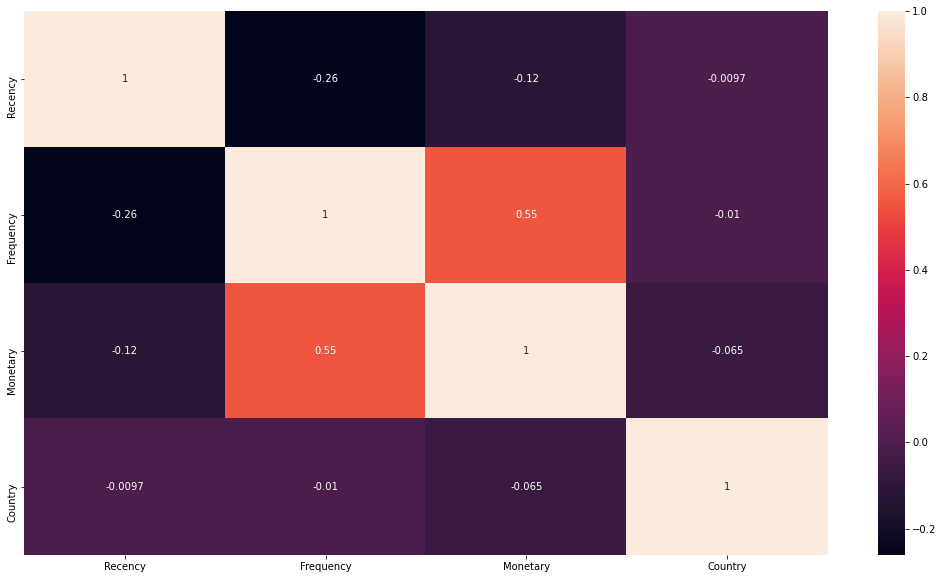

In [107]:
plt.figure(figsize=(18,10))
sns.heatmap(data = kmeans_df.corr(), annot=True)

### ii. Visualizing Feature Distributions

To get a better understanding of the dataset, we can costruct a scatter matrix of each of the three features.

<Figure size 1296x720 with 0 Axes>

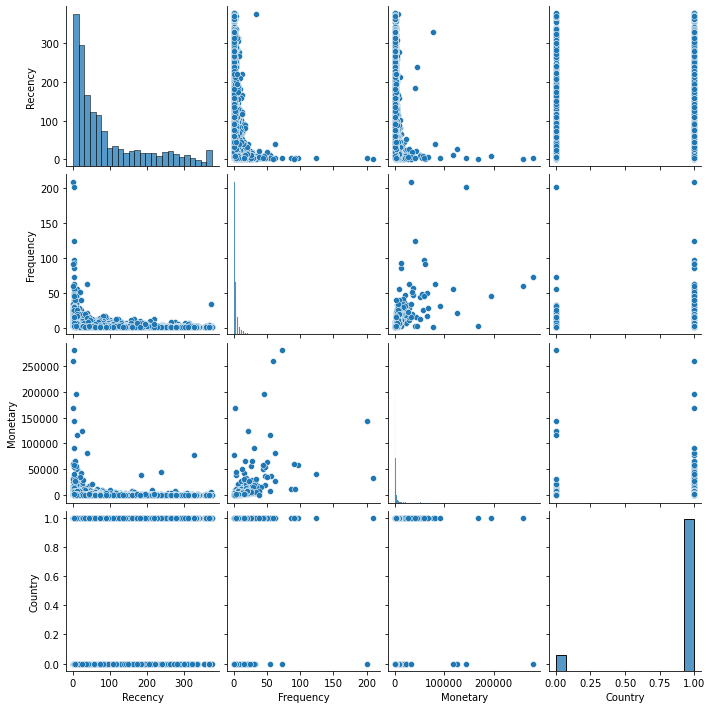

In [108]:
plt.figure(figsize=(18,10))
sns.pairplot(data = kmeans_df)

### iii. Data Normalization

1. We will use the logarithm method to normalize the values in a column.

In [109]:
kmeans_df['Recency'] = (kmeans_df.Recency + 0.1).apply(np.log)
kmeans_df['Frequency'] = (kmeans_df.Frequency + 0.1).apply(np.log)
kmeans_df['Monetary'] = kmeans_df.Monetary.apply(np.log)
kmeans_df.sample(10)

,Recency,Frequency,Monetary,Country
CustomerID,,,,
15091.0,4.235555,0.095310,6.175264,1
12726.0,3.404525,1.960095,7.866761,0
12538.0,3.437208,0.095310,5.897016,0
17091.0,1.410987,2.208274,8.250035,1
15319.0,5.652840,0.095310,5.320568,1
12553.0,2.312535,2.312535,8.213999,0
14865.0,2.208274,0.741937,3.955082,1
14673.0,1.629241,1.629241,7.459569,1
16793.0,4.079231,0.095310,5.496512,1


2. Ploting normalized data with scatter matrix or pairplot.

<Figure size 1296x720 with 0 Axes>

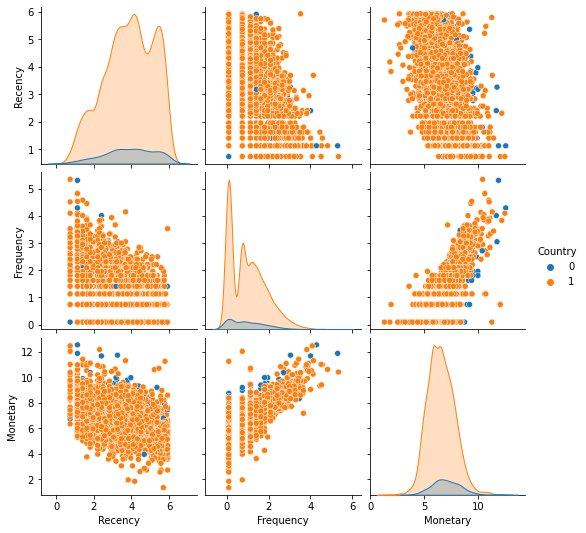

In [110]:
plt.figure(figsize=(18,10))
sns.pairplot(data = kmeans_df, hue='Country')

In [111]:
kmeans_df.corr()

,Recency,Frequency,Monetary,Country
Recency,1.000000,-0.574985,-0.485165,-0.005615
Frequency,-0.574985,1.000000,0.810110,0.003473
Monetary,-0.485165,0.810110,1.000000,-0.116554
Country,-0.005615,0.003473,-0.116554,1.000000


<AxesSubplot:>

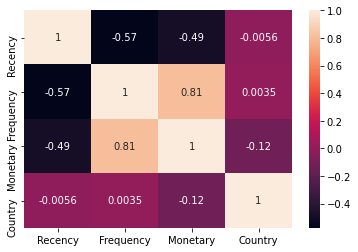

In [112]:
sns.heatmap(kmeans_df.corr(), annot=True)

## K-Means Implementation

For k-means, we have to set k to the number of clusters we want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
<br>
<br>
**Note**: K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

In [113]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

### i. Define the Optimal Number of Clusters

In [114]:
from pyclustertend import hopkins
hopkins(kmeans_df, kmeans_df.shape[0])

0.07038550795975841

Our Hopkins value is too close to 0 which means we have **a dataset which has a quite small tendency to clustering**. We need to further analyse with silouhette scores whether our data has a tendency to clustering or not.

[Yellow Brick Elbow](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

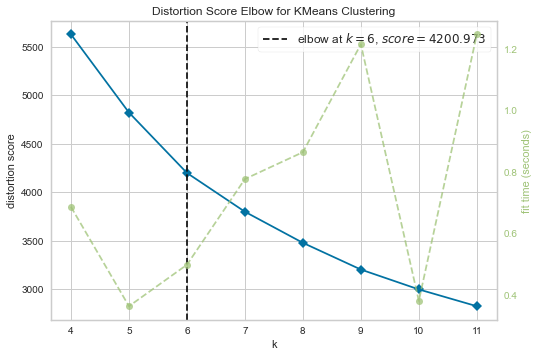

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
plt.rcParams['figure.facecolor'] = 'white'
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(kmeans_df)        # Fit the data to the visualizer
visualizer.show() 

According to YellowBrick Elbow method we should apply 7 n_clusters. We will also check Classic Elbow Methode.

[Classic Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

In [116]:
import pickle

ssd = []

K = range(1,10)

matrix = kmeans_df.values

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(matrix)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

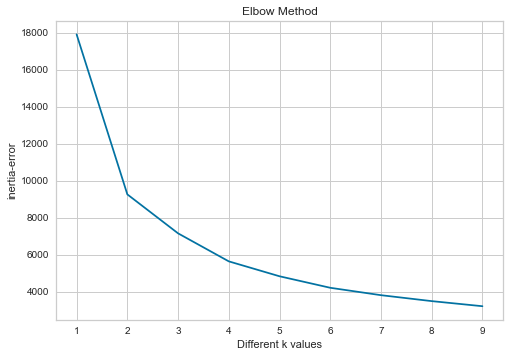

In [117]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [118]:
import matplotlib.cm as cm
X = kmeans_df.values

for n_clusters in range(2,11):

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

For n_clusters = 2 The average silhouette_score is : 0.40932592290990005
For n_clusters = 3 The average silhouette_score is : 0.30906209986703553
For n_clusters = 4 The average silhouette_score is : 0.328096416059277
For n_clusters = 5 The average silhouette_score is : 0.3088820656071676
For n_clusters = 6 The average silhouette_score is : 0.29431335959054633
For n_clusters = 7 The average silhouette_score is : 0.29417380311504193
For n_clusters = 8 The average silhouette_score is : 0.29222177088720824
For n_clusters = 9 The average silhouette_score is : 0.27216668609484995
For n_clusters = 10 The average silhouette_score is : 0.26670737868353706


The silhouette_score is descending as the granulirity arises. This supports our first finding regarding tendency to clustering which we found too small by Hopkins methode.

For the sake of tendency to clustering we will pick ***4 n_clusters*** which also has an acceptable elbow score. (Yellowbrick Elbow method reccomends 7 clusters however silhoutte score is too low for 7 n_clousters.) 

### ii. Model Fitting

Fitting the K-Means Algorithm with the optimal number of clusters we decided and saving the model to disk.

In [119]:
kmeans = KMeans(n_clusters = 4).fit(kmeans_df)
labels = kmeans.labels_
kmeans_df['Labels'] = kmeans.labels_
kmeans_df.head()

,Recency,Frequency,Monetary,Country,Labels
CustomerID,,,,,
12346.0,5.790266,0.095310,11.253942,1,2
12347.0,1.410987,1.960095,8.368693,0,0
12348.0,4.345103,1.410987,7.494007,0,2
12349.0,3.000720,0.095310,7.471676,0,3
12350.0,5.743324,0.095310,5.812338,0,1


### iii. Visualizing the Clusters

    (1) Creating a scatter plot and select cluster centers

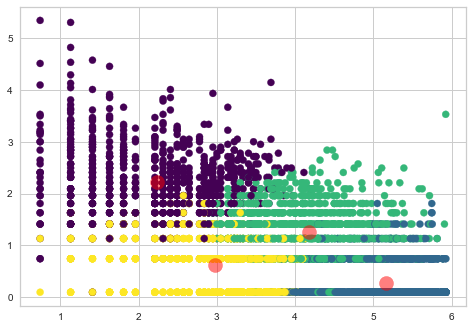

In [120]:
plt.scatter(kmeans_df.iloc[:,0], kmeans_df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red',alpha=0.5, label = 'Centroids')

    (2) Visualizing Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

<AxesSubplot:xlabel='Labels', ylabel='Recency'>

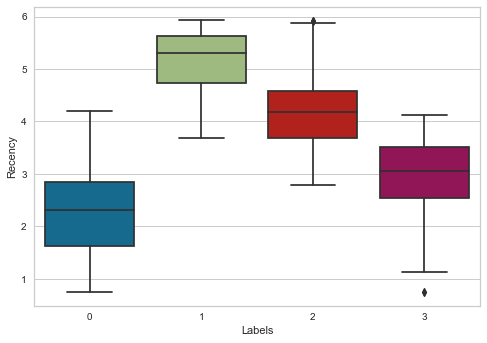

In [121]:
sns.boxplot(x='Labels', y='Recency', data=kmeans_df)

<AxesSubplot:xlabel='Labels', ylabel='Frequency'>

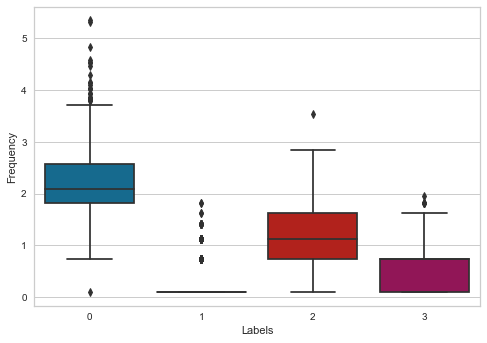

In [122]:
sns.boxplot(x='Labels', y='Frequency', data=kmeans_df)

<AxesSubplot:xlabel='Labels', ylabel='Monetary'>

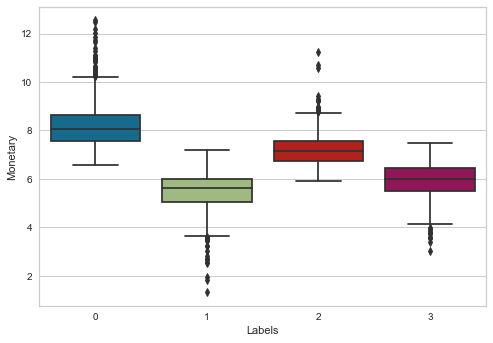

In [123]:
sns.boxplot(x='Labels', y='Monetary', data=kmeans_df)

### iv. Concluding remarks for K-Means Clustering

In [124]:
kmeans_df.head(10)

,Recency,Frequency,Monetary,Country,Labels
CustomerID,,,,,
12346.0,5.790266,0.095310,11.253942,1,2
12347.0,1.410987,1.960095,8.368693,0,0
12348.0,4.345103,1.410987,7.494007,0,2
12349.0,3.000720,0.095310,7.471676,0,3
12350.0,5.743324,0.095310,5.812338,0,1
12352.0,3.640214,2.091864,7.826459,0,2
12353.0,5.328361,0.095310,4.488636,0,1
12354.0,5.455748,0.095310,6.984161,0,1
12355.0,5.375741,0.095310,6.129921,0,1


In [125]:
kmeans_df.Labels.value_counts(normalize=True)

1    0.320655
2    0.274320
3    0.210005
0    0.195021
Name: Labels, dtype: float64

**Conclusion**

As Silouhette Analysis and Hopkins method claimed our clusters out of K-Means Clustering are not clearly seperated. On the other hand we obtained 4 groups of customers regarding their RFM features and also location. 

- Cluster 0 : The first cluster could be called "Best Customers" (39.6% of all customers) as they purchase recently, frequent buyers, and spent the most. 

- Cluster 1 : Second cluster is an obvious 'New Commers' (35.3% of all customers) as they purchase recently with lowest frequency and low spending.

- Cluster 2 : Third cluster is highly critical and we may call them  'Alerting Precious' (5.3% of all customers) as they used to purchase with very high spending at a high frequency however their recency is too low. 

- Cluster 3 : Fourth class could be called "Promising Loyals" (19.5% of all customers) as they purchase very recently, and spent high however with a low frequency.

- What is missing : A group of customers who bought a very long time ago and have not shown up since, with low frequency and too little spending. 

**Annotation:**

Limitations of K-means clustering:

1. There is no assurance that it will lead to the global best solution.
2. Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of K-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as we might hope.

# 5. Creating Cohort & Conducting Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:
- Invoice Data
- CustomerID
- Price
- Quantity

## Feature Engineering

### i. Extracting the Month of the Purchase

In [126]:
cohort_df = rfm_df
cohort_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,1,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,1,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,1,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,1,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,1,20.34,2010-12-01


In [127]:
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  int64         
 8   Revenue      392692 non-null  float64       
 9   Date         392692 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 33.0+ MB


Now we will use the function created above to convert all the invoice dates into respective month date format.

In [137]:
def first_of_month(date_x):    
    dt_formatted = dt.datetime.strptime(str(date_x), '%Y-%m-%d %H:%M:%S')
    return dt.datetime(dt_formatted.year, dt_formatted.month, 1)

In [138]:
cohort_df['InvoiceMonth'] = cohort_df['InvoiceDate'].apply(first_of_month)
cohort_df['CohortMonth'] = cohort_df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [139]:
cohort_df[['InvoiceDate','InvoiceMonth', 'CohortMonth']].head()

,InvoiceDate,InvoiceMonth,CohortMonth
0,2010-12-01 08:26:00,2010-12-01,2010-12-01
1,2010-12-01 08:26:00,2010-12-01,2010-12-01
2,2010-12-01 08:26:00,2010-12-01,2010-12-01
3,2010-12-01 08:26:00,2010-12-01,2010-12-01
4,2010-12-01 08:26:00,2010-12-01,2010-12-01


### ii. Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, we will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date. 

In [140]:
def date_granule(dfx, colx):
    year = dfx[colx].dt.year
    month = df[colx].dt.month
    day = df[colx].dt.day
    return year, month, day

In [141]:
invoice_year, invoice_month, invoice_day = date_granule(cohort_df, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = date_granule(cohort_df, 'CohortMonth')

In [142]:
diff_year = invoice_year - cohort_year 
diff_month = invoice_month - cohort_month

cohort_df['CohortIndex'] = diff_year * 12 + diff_month + 1

In [143]:
cohort_df[['CustomerID', 'InvoiceDate', 'InvoiceMonth', 'CohortMonth', 'CohortIndex']].sample(10)

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth,CohortIndex
412180,17211.0,2011-10-23 11:10:00,2011-10-01,2010-12-01,11
366992,15175.0,2011-09-29 11:31:00,2011-09-01,2011-09-01,1
361222,15344.0,2011-09-26 14:48:00,2011-09-01,2011-09-01,1
23544,12748.0,2010-12-10 11:24:00,2010-12-01,2010-12-01,1
292099,17220.0,2011-08-05 15:30:00,2011-08-01,2010-12-01,9
252336,15021.0,2011-07-06 11:52:00,2011-07-01,2010-12-01,8
378412,12415.0,2011-10-05 12:44:00,2011-10-01,2011-01-01,10
425020,16049.0,2011-10-28 16:10:00,2011-10-01,2011-09-01,2
119300,16327.0,2011-03-14 14:51:00,2011-03-01,2010-12-01,4
214983,15150.0,2011-06-06 12:51:00,2011-06-01,2011-03-01,4


## Creating 1st Cohort: User number & Retention Rate

### i. Pivot Cohort and Cohort Retention

In [144]:
cohort_first = cohort_df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
pivot_first = cohort_first.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID').round(1)
pivot_first

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
sizes = pivot_first.iloc[:,0]
retention = pivot_first.divide(sizes, axis=0).round(3)*100
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ii. Visualizing analysis of cohort 1

<AxesSubplot:title={'center':'Retention Rates'}, xlabel='CohortIndex', ylabel='CohortMonth'>

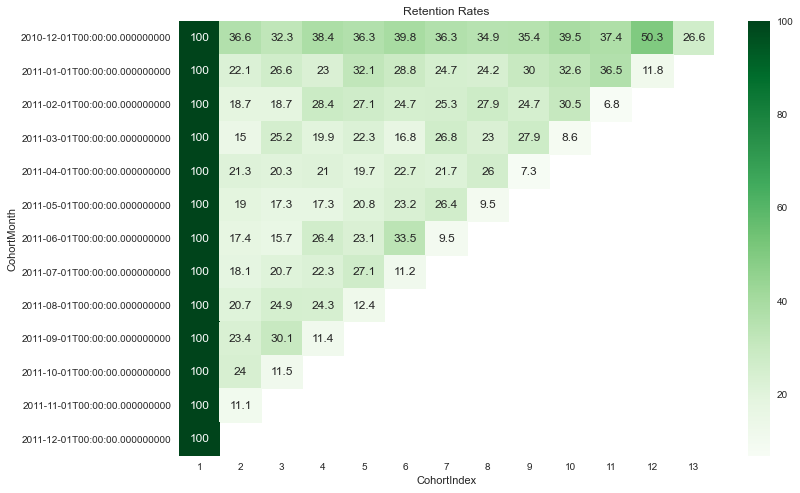

In [146]:
plt.figure(figsize=(12,8))
plt.title('Retention Rates')
sns.heatmap(data=retention, annot=True, cmap='Greens', fmt='g')

## Create the 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort

In [147]:
cohort_second = cohort_df.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
pivot_second = cohort_second.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity').round(1)
pivot_second

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,12.1,15.7,15.7,15.9,13.6,14.9,16.1,15.6,18.2,17.7,19.0,13.6,15.4
2011-01-01,17.5,13.5,12.7,15.3,12.8,15.4,15.0,15.0,11.6,10.6,9.6,10.2,NaN
2011-02-01,11.2,13.7,19.0,12.0,12.3,12.3,13.6,13.4,11.0,12.4,13.4,NaN,NaN
2011-03-01,10.0,11.7,13.3,10.1,13.8,13.0,13.5,13.9,11.3,9.7,NaN,NaN,NaN
2011-04-01,10.0,10.4,9.8,11.9,12.0,8.7,10.0,9.7,7.6,NaN,NaN,NaN,NaN
2011-05-01,11.5,9.7,14.2,12.8,11.2,8.8,10.8,113.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.7,14.7,10.9,13.7,10.7,10.0,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.9,13.8,7.4,8.2,6.2,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.1,6.2,5.4,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ii. Visualizing Cohort-2

<AxesSubplot:title={'center':'Average Quantity'}, xlabel='CohortIndex', ylabel='CohortMonth'>

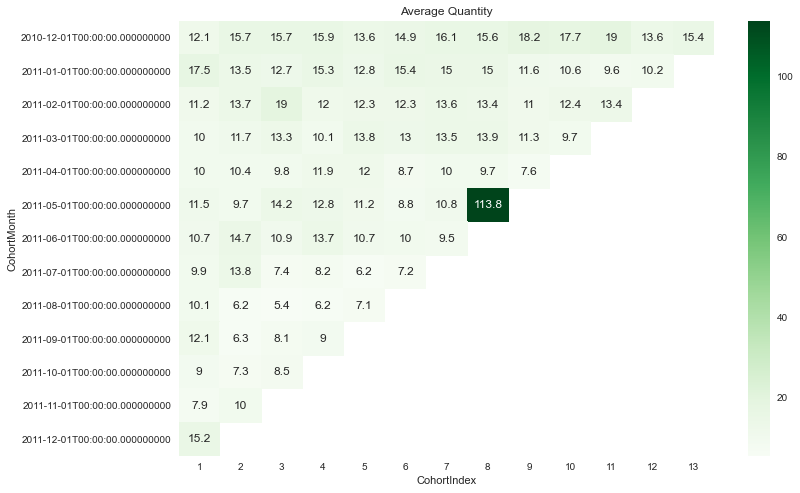

In [148]:
plt.figure(figsize=(12,8))
plt.title('Average Quantity')
sns.heatmap(data=pivot_second, annot=True, cmap='Greens', fmt='g')

## Create the 3rd Cohort: Average Sales


### i. Pivot Cohort

In [149]:
cohort_third = cohort_df.groupby(['CohortMonth', 'CohortIndex'])['Revenue'].mean().reset_index()
pivot_third = cohort_third.pivot(index='CohortMonth', columns='CohortIndex', values='Revenue').round(1)
pivot_third

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,22.2,27.3,26.9,27.2,21.2,28.1,28.3,27.4,29.3,33.5,34.0,23.6,25.8
2011-01-01,26.9,25.1,21.0,31.2,22.5,26.3,25.2,25.5,19.1,22.3,19.7,19.8,NaN
2011-02-01,17.9,20.8,21.5,19.4,17.7,17.0,22.2,22.9,18.8,22.2,23.5,NaN,NaN
2011-03-01,17.6,21.1,22.7,18.0,21.1,19.0,22.0,20.0,16.8,13.2,NaN,NaN,NaN
2011-04-01,17.0,21.0,19.5,18.7,19.5,15.0,15.3,16.0,12.3,NaN,NaN,NaN,NaN
2011-05-01,20.5,17.3,22.2,20.9,18.6,14.1,17.0,234.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,24.0,16.3,19.9,20.4,15.3,16.7,13.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,15.0,23.5,11.8,13.0,10.9,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.5,13.2,12.5,15.9,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ii. Visualizing Cohort-3

<AxesSubplot:title={'center':'Retention Rates'}, xlabel='CohortIndex', ylabel='CohortMonth'>

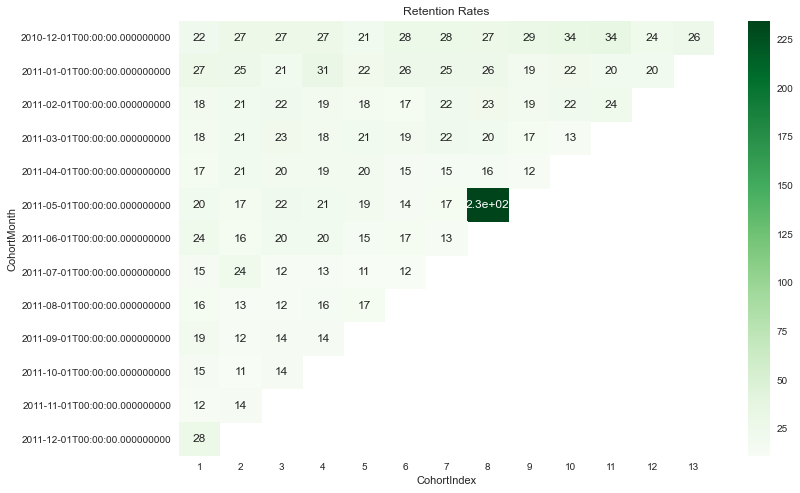

In [150]:
plt.figure(figsize=(12,8))
plt.title('Retention Rates')
sns.heatmap(data=pivot_third, annot=True, cmap='Greens')

For e-commerce organisations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. By performing Cohort analysis we can get answers to following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employed to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasoanlity pattern in Customer behahiour?

## 6. COCLUSION

During the project, we performed three different types of analyses independently. 
All three analysis methods offer some specific advantages and also have limitations. 
In this project, we were able to see in which area and to what extent we should use these methods.

- First, we used RFM segmentation to divide our customers into insightful clusters. 
What makes RFM analysis attractive is the flexibility it offers. We can specify the segmentation in terms of our business needs.
On the other hand, it is susceptible to user-induced biases.

- Then we applied K-Means clustering to see the unsupervised machine learning results as clusters.
Since our dataset does not have a significant tendency to cluster, K-Means clustering did not produce a satisfactory clustering.

- Finally, we used cohort analysis to gain new insights from the data related to time-based cohorts. 
The strength of cohort analysis is its elasticity, as it provides specific analysis based on business needs.
